# PPI prediction for MM network

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score, matthews_corrcoef, f1_score
from sklearn.model_selection import cross_val_score
import logging
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
from scipy.stats import ttest_ind
import scipy.stats  as stats
import networkx as nx
from joblib import dump, load
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedShuffleSplit
import pickle
import xgboost as xgb
#print(sklearn.__version__)
import import_ipynb
from PPI_functions import *
network_name='MM'


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


1.25.2
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]
importing Jupyter notebook from PPI_functions.ipynb
1.25.2
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]


## source of data
## https://github.com/mlbioinfolab/ppi-metago/blob/master/protein_pair/EC2/EC2_pair.txt

## publication: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-2907-1

In [2]:
#path_h="/Users/temih/Dropbox/PPI_similarity_new/data/"   # windows
path_h="/Users/hamidteimouri/Dropbox/PPI_similarity_new/data/" # mac


# Step0: Visualization of the network

In [3]:
#G4=network_vis('EC2',path_h)
#!pip install xgboost scikit-learn


# Step 1: Feature extraction using propy


#Descriptors_complete('EC2_sequence_fasta.txt','EC2_descriptors.csv')

# Step 2: Calculate PP distance

In [4]:
# distance_PP('EC2')

# Step 3: Upload data and train/test spilit

In [5]:
X,y,klist,df3=load_network_data(network_name, path_h)



In [6]:
ns = 18
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

# Step 4: Train logistic and SVM models using all features

In [7]:
all_features_traning_results = models_crossval(Xtrain_cv,Ytrain_cv,ns)


In [8]:
all_features_traning_results

{'average logistic regression accuracy:': 0.9565972222222222,
 'average SVM accuracy:': 0.9457638888888888,
 'average logistic regression recall:': 0.9565972222222222,
 'average SVM recall:': 0.9457638888888888,
 'average logistic regression matthews_corrcoef:': 0.9133433166487909,
 'average SVM matthews_corrcoef:': 0.892358394883019,
 'average logistic regression f1 score:': 0.9133433166487909,
 'average SVM f1 score:': 0.892358394883019}

In [9]:

## Save dat into pickle file
data_save = {}
data_save['all_features_traning_results']=all_features_traning_results

## now we check if model overfits

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=5
Y = y
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    results = models_overfitting(X_train, Y_train, X_test, Y_test)


Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.9513
Logistic Regression test_accuracy: 0.6900
Logistic Regression train_recall: 0.9512
Logistic Regression test_recall: 0.6900
Logistic Regression train_mcc: 0.9025
Logistic Regression test_mcc: 0.3807
Logistic Regression train_f1: 0.9513
Logistic Regression test_f1: 0.6990


SVC train_accuracy: 0.9500
SVC test_accuracy: 0.7150
SVC train_recall: 0.9500
SVC test_recall: 0.7150
SVC train_mcc: 0.9006
SVC test_mcc: 0.4305
SVC train_f1: 0.9509
SVC test_f1: 0.7077


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.9650
Logistic Regression test_accuracy: 0.5950
Logistic Regression train_recall: 0.9650
Logistic Regression test_recall: 0.5950
Logistic Regression train_mcc: 0.9300
Logistic Regression test_mcc: 0.1905
Logistic Regression train_f1: 0.9651
Logistic Regression test_f1: 0.6087


SVC train_accuracy: 0.9425
SVC test_accuracy: 0.6050
SVC train_recall: 0.9425
SVC test_recall: 0.605

# Step 5: Feature Selection Using Lasso Regression

In [11]:
AA=0.004
ns = 15
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)
featuredict_lasso = lasso_feature_selection(Xtrain_cv,Ytrain_cv,AA,ns,klist)
featuredict_lasso

C -0.35068269230776766
CR 0.06972139978617092
CP 0.09874982692755505
GW -0.2664078456396544
IN -0.19005939800834395
KR -0.19155428052327717
KQ -0.19035945499562157
PI -0.15726980386675116
GearyAuto_Hydrophobicity2 -0.14776613695338814
_SolventAccessibilityT12 -0.12208281136308098
APAAC4 -0.12462491260802608


{'C': -0.35068269230776766,
 'CR': 0.06972139978617092,
 'CP': 0.09874982692755505,
 'GW': -0.2664078456396544,
 'IN': -0.19005939800834395,
 'KR': -0.19155428052327717,
 'KQ': -0.19035945499562157,
 'PI': -0.15726980386675116,
 'GearyAuto_Hydrophobicity2': -0.14776613695338814,
 '_SolventAccessibilityT12': -0.12208281136308098,
 'APAAC4': -0.12462491260802608}

In [12]:
data_save['selected_features_lasso']=featuredict_lasso

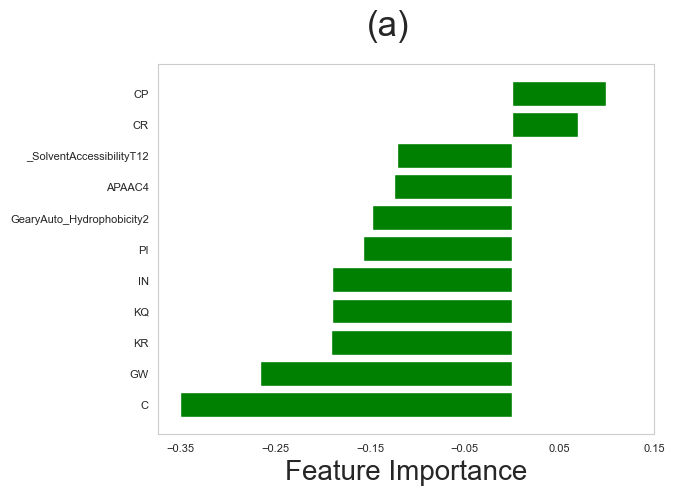

In [13]:

sorted_dict = sorted(featuredict_lasso.items(), key=lambda x: x[1])
# Get the 10 highest positive keys
positive_keys = dict(sorted_dict[-8:])
# Get the 10 lowest negative keys
negative_keys = dict(sorted_dict[:8])
# Create a new dictionary containing the selected keys
new_dict = {**positive_keys, **negative_keys}
featuredict=new_dict
dr=0.1
selected_features_plotter(featuredict,network_name,'lasso',20,dr)


## Now we train model using features selection from LASSO mothod

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=10
scaled_features_df=df3
mean_accu_log=0
mean_accu_svm=0
mean_recall_log=0
mean_recall_svm=0
mean_mcc_log=0
mean_mcc_svm=0
mean_f1_log=0
mean_f1_svm=0
cols=list(featuredict_lasso.keys())
XX=np.array(scaled_features_df[cols])
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(XX, y):
    X_train, X_test = XX[train_index], XX[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    #results = models_overfitting2(X_train, Y_train, X_test, Y_test)
    #... rest of your code
    results = models_overfitting(X_train, Y_train, X_test, Y_test)
    mean_accu_log = mean_accu_log + results['logistic_regression']['test_accuracy']
    mean_accu_svm = mean_accu_svm + results['svc']['test_accuracy']
    mean_recall_log = mean_recall_log + results['logistic_regression']['test_recall']
    mean_recall_svm = mean_recall_svm + results['svc']['test_recall']
    mean_mcc_log = mean_mcc_log + results['logistic_regression']['test_mcc']
    mean_mcc_svm = mean_mcc_svm + results['svc']['test_mcc']
    mean_f1_log = mean_f1_log + results['logistic_regression']['test_f1']
    mean_f1_svm = mean_f1_svm + results['svc']['test_f1']
    
print('mean accuracy for log regression is' , mean_accu_log/ns)
print('mean accuracy for svm is' , mean_accu_svm/ns)
print('mean recall for log regression is' , mean_recall_log/ns)
print('mean recall for svm is' , mean_recall_svm/ns)
print('mean mcc for log regression is' , mean_mcc_log/ns)
print('mean mcc for svm is' , mean_mcc_svm/ns)
print('mean f1 for log regression is' , mean_f1_log/ns)
print('mean f1 for svm is' , mean_f1_svm/ns)

Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.6525
Logistic Regression test_accuracy: 0.7250
Logistic Regression train_recall: 0.6525
Logistic Regression test_recall: 0.7250
Logistic Regression train_mcc: 0.3059
Logistic Regression test_mcc: 0.4500
Logistic Regression train_f1: 0.6651
Logistic Regression test_f1: 0.7236


SVC train_accuracy: 0.7712
SVC test_accuracy: 0.7200
SVC train_recall: 0.7712
SVC test_recall: 0.7200
SVC train_mcc: 0.5425
SVC test_mcc: 0.4408
SVC train_f1: 0.7698
SVC test_f1: 0.7113


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.6637
Logistic Regression test_accuracy: 0.6250
Logistic Regression train_recall: 0.6638
Logistic Regression test_recall: 0.6250
Logistic Regression train_mcc: 0.3292
Logistic Regression test_mcc: 0.2500
Logistic Regression train_f1: 0.6801
Logistic Regression test_f1: 0.6231


SVC train_accuracy: 0.7662
SVC test_accuracy: 0.6450
SVC train_recall: 0.7663
SVC test_recall: 0.645

In [15]:
scaled_features_df=df3
cols=list(featuredict_lasso.keys())
XX=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(XX, y):
    Xtrain_cv[i] = XX[train_index]
    Xtest_cv[i] = XX[test_index]
    Ytrain_cv[i] = y[train_index]
    Ytest_cv[i] = y[test_index]
    
    i+=1
    #print(i)
    

In [16]:
# traning metrics
lasso_results = models_crossval(Xtrain_cv,Ytrain_cv,ns)
lasso_results

{'average logistic regression accuracy:': 0.666875,
 'average SVM accuracy:': 0.7695,
 'average logistic regression recall:': 0.666875,
 'average SVM recall:': 0.7695,
 'average logistic regression matthews_corrcoef:': 0.3345280177515333,
 'average SVM matthews_corrcoef:': 0.5392368988120522,
 'average logistic regression f1 score:': 0.3345280177515333,
 'average SVM f1 score:': 0.5392368988120522}

In [17]:
data_save['lasso_results']=lasso_results

# Step 7: Feature Selection Using Support Vector Machine

In [18]:
ns = 15
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

In [19]:

CC = linear_SVM_grid_search(X,y,ns)
#CC=0.2
CC

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


0.1

In [20]:
featuredict_svm = svm_feature_selection(Xtrain_cv,Ytrain_cv,CC,ns,klist)
featuredict_svm

C -0.8394624977940897
CR 0.19179427336927482
CP 0.31567405773901025
GW -0.6077717696782419
IN -0.4414985222984869
KR -0.4493491776575234
KQ -0.38073745807824566
PI -0.3461385276178385
GearyAuto_Hydrophobicity2 -0.41170684379057615
GearyAuto_Steric10 0.39356378985970364
_SecondaryStrC1 -0.35668070098439997
_ChargeC2 -0.41113237596493085
_SolventAccessibilityT12 -0.25867676179113813
APAAC4 -0.3352400699646847
PAAC34 0.2155490195293007


{'C': -0.8394624977940897,
 'CR': 0.19179427336927482,
 'CP': 0.31567405773901025,
 'GW': -0.6077717696782419,
 'IN': -0.4414985222984869,
 'KR': -0.4493491776575234,
 'KQ': -0.38073745807824566,
 'PI': -0.3461385276178385,
 'GearyAuto_Hydrophobicity2': -0.41170684379057615,
 'GearyAuto_Steric10': 0.39356378985970364,
 '_SecondaryStrC1': -0.35668070098439997,
 '_ChargeC2': -0.41113237596493085,
 '_SolventAccessibilityT12': -0.25867676179113813,
 'APAAC4': -0.3352400699646847,
 'PAAC34': 0.2155490195293007}

In [21]:
data_save['selected_features_svm']=featuredict_svm

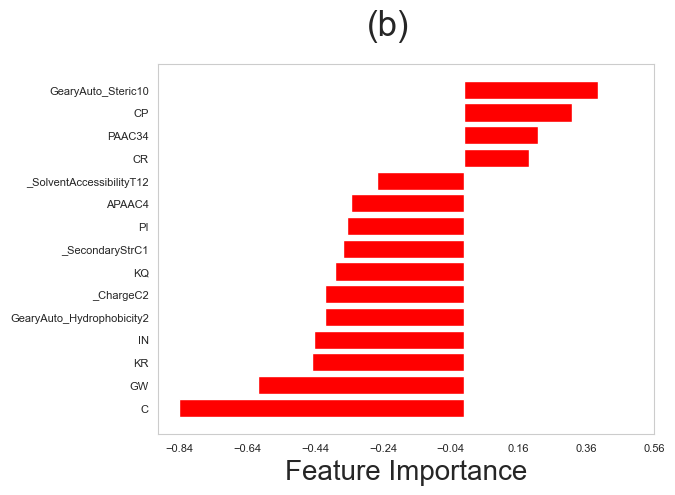

In [29]:

sorted_dict = sorted(featuredict_svm.items(), key=lambda x: x[1])
# Get the 10 highest positive keys
positive_keys = dict(sorted_dict[-8:])
# Get the 10 lowest negative keys
negative_keys = dict(sorted_dict[:8])
# Create a new dictionary containing the selected keys
new_dict = {**positive_keys, **negative_keys}
featuredict=new_dict
dr=0.2
selected_features_plotter(featuredict,network_name,'svm',20,dr)


## Training models using selected features from SVM

In [30]:
scaled_features_df=df3

cols=list(featuredict_svm.keys())
XX=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(XX, y):
    Xtrain_cv[i] = XX[train_index]
    Xtest_cv[i] = XX[test_index]
    Ytrain_cv[i] = y[train_index]
    Ytest_cv[i] = y[test_index]
    i+=1

In [31]:
results_svm = models_crossval(Xtrain_cv,Ytrain_cv,ns)
results_svm

{'average logistic regression accuracy:': 0.6980000000000001,
 'average SVM accuracy:': 0.7983750000000001,
 'average logistic regression recall:': 0.6980000000000001,
 'average SVM recall:': 0.7983750000000001,
 'average logistic regression matthews_corrcoef:': 0.397508208594403,
 'average SVM matthews_corrcoef:': 0.5970414617546173,
 'average logistic regression f1 score:': 0.397508208594403,
 'average SVM f1 score:': 0.5970414617546173}

In [32]:
data_save['results_svm']=results_svm

# check for overfitting

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=10
scaled_features_df=df3
mean_accu_log=0
mean_accu_svm=0
mean_recall_log=0
mean_recall_svm=0
mean_mcc_log=0
mean_mcc_svm=0
mean_f1_log=0
mean_f1_svm=0
cols=list(featuredict_svm.keys())
XX=np.array(scaled_features_df[cols])
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(XX, y):
    X_train, X_test = XX[train_index], XX[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    #results = models_overfitting2(X_train, Y_train, X_test, Y_test)
    #... rest of your code
    results = models_overfitting(X_train, Y_train, X_test, Y_test)
    mean_accu_log = mean_accu_log + results['logistic_regression']['test_accuracy']
    mean_accu_svm = mean_accu_svm + results['svc']['test_accuracy']
    mean_recall_log = mean_recall_log + results['logistic_regression']['test_recall']
    mean_recall_svm = mean_recall_svm + results['svc']['test_recall']
    mean_mcc_log = mean_mcc_log + results['logistic_regression']['test_mcc']
    mean_mcc_svm = mean_mcc_svm + results['svc']['test_mcc']
    mean_f1_log = mean_f1_log + results['logistic_regression']['test_f1']
    mean_f1_svm = mean_f1_svm + results['svc']['test_f1']
    
print('mean accuracy for log regression is' , mean_accu_log/ns)
print('mean accuracy for svm is' , mean_accu_svm/ns)
print('mean recall for log regression is' , mean_recall_log/ns)
print('mean recall for svm is' , mean_recall_svm/ns)
print('mean mcc for log regression is' , mean_mcc_log/ns)
print('mean mcc for svm is' , mean_mcc_svm/ns)
print('mean f1 for log regression is' , mean_f1_log/ns)
print('mean f1 for svm is' , mean_f1_svm/ns)

Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.6863
Logistic Regression test_accuracy: 0.7500
Logistic Regression train_recall: 0.6863
Logistic Regression test_recall: 0.7500
Logistic Regression train_mcc: 0.3743
Logistic Regression test_mcc: 0.5001
Logistic Regression train_f1: 0.7008
Logistic Regression test_f1: 0.7525


SVC train_accuracy: 0.8037
SVC test_accuracy: 0.7400
SVC train_recall: 0.8037
SVC test_recall: 0.7400
SVC train_mcc: 0.6076
SVC test_mcc: 0.4804
SVC train_f1: 0.8055
SVC test_f1: 0.7347


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.7113
Logistic Regression test_accuracy: 0.6800
Logistic Regression train_recall: 0.7112
Logistic Regression test_recall: 0.6800
Logistic Regression train_mcc: 0.4243
Logistic Regression test_mcc: 0.3603
Logistic Regression train_f1: 0.7240
Logistic Regression test_f1: 0.6863


SVC train_accuracy: 0.7913
SVC test_accuracy: 0.6650
SVC train_recall: 0.7913
SVC test_recall: 0.665

In [34]:
with open(network_name+'_results.pkl' , 'wb') as file:
    pickle.dump(data_save,file)

In [35]:
with open(network_name+'_results.pkl' , 'rb') as file:
    load_data=pickle.load(file)
    